In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir EXABY

In [4]:
import numpy as np
import pandas as pd
import random
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize 
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
np.set_printoptions(precision=5, suppress=True)  
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler

sns.set()

# Analisis de las variables 

In [5]:
data = pd.read_table('/content/drive/MyDrive/EXABY/full_df.csv', delimiter = ',')

In [6]:
data.drop(columns=data.columns[0], axis=1, inplace=True) 

In [7]:
data.head(5) 

,Genmodel_ID,Adv_ID,Reg_year,Bodytype,Runned_Miles,Gearbox,Fuel_type,Engine_power,Wheelbase,Height,...,Ad_Date,Ad_price_GBP,Engine_size,Entry_price_GBP,Gas_emission,Tot_devaluation,Percentage_devaluation,Age,Tot_Dev_PerYear,Per_Dev_PerYear
0,10_1,10_1$$27,2000.0,Saloon,30000,Automatic,Petrol,433.333333,3116.0,1515.0,...,2018-03-01,29934.126189,6.8,164300.0,456.0,-134365.873811,-0.817808,18.0,-7464.770767,-0.045434
1,10_1,10_1$$29,2000.0,Saloon,46000,Automatic,Petrol,433.333333,3116.0,1515.0,...,2017-11-01,21775.765194,6.8,164300.0,456.0,-142524.234806,-0.867463,17.0,-8383.778518,-0.051027
2,10_1,10_1$$16,2000.0,Saloon,49700,Automatic,Petrol,433.333333,3116.0,1515.0,...,2017-12-01,28889.918379,4.4,145000.0,390.0,-116110.081621,-0.800759,17.0,-6830.004801,-0.047103
3,10_1,10_1$$13,2000.0,Saloon,53444,Automatic,Petrol,433.333333,3116.0,1515.0,...,2018-04-01,21579.905257,6.8,164300.0,456.0,-142720.094743,-0.868655,18.0,-7928.894152,-0.048259
4,10_1,10_1$$1,2000.0,Saloon,60000,Automatic,Petrol,433.333333,3116.0,1515.0,...,2018-04-01,21094.247044,6.8,164300.0,456.0,-143205.752956,-0.871611,18.0,-7955.875164,-0.048423


In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209520 entries, 0 to 209519
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Genmodel_ID             209520 non-null  object 
 1   Adv_ID                  209520 non-null  object 
 2   Reg_year                209520 non-null  float64
 3   Bodytype                209520 non-null  object 
 4   Runned_Miles            209520 non-null  object 
 5   Gearbox                 209520 non-null  object 
 6   Fuel_type               209520 non-null  object 
 7   Engine_power            209520 non-null  float64
 8   Wheelbase               209520 non-null  float64
 9   Height                  209520 non-null  float64
 10  Width                   209520 non-null  float64
 11  Length                  209520 non-null  float64
 12  Average_mpg             209520 non-null  float64
 13  Top_speed               209520 non-null  float64
 14  Seat_num            

## Reg_year 

In [9]:
data.Reg_year.unique()  

array([2000., 2002., 2003., 2016., 2017., 2004., 2005., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2019., 2006., 2007.,
       2001.])

In [10]:
data.Reg_year = data.Reg_year.astype(int) 

## Bodytype

In [11]:
data.Bodytype.unique() 

array(['Saloon', 'SUV', 'Coupe', 'Convertible', 'Hatchback', 'Estate',
       'MPV', 'Combi Van', 'Panel Van', 'Minibus', 'Window Van',
       'Car Derived Van', 'Limousine'], dtype=object)

## Gearbox 

In [12]:
data.Gearbox.unique()  

array(['Automatic', 'Semi-Automatic', 'Manual'], dtype=object)

## Fuel_type

In [13]:
data.Fuel_type.unique()  

array(['Petrol', 'Diesel', 'Other'], dtype=object)

In [14]:
data[data['Fuel_type'] == 'Other'].shape  

(5063, 26)

## Runned_Miles

In [15]:
data.Runned_Miles.unique()

array(['30000', '46000', '49700', ..., '91211', '91812', '96824'],
      dtype=object)

**Runned_Miles no tiene valores decimales por lo tanto se convierte en una variable de tipo int**</br>
***Es necesario cambiar el string "1 mile" a 1***

In [16]:
data[data['Runned_Miles'] == '1 mile'].shape 

(20, 26)

In [17]:
data.Runned_Miles = data.Runned_Miles.replace('1 mile', 1)

In [18]:
data.Runned_Miles = data.Runned_Miles.astype(int) 

## Ad_Date 

In [19]:
data.Ad_Date.unique() 

array(['2018-03-01', '2017-11-01', '2017-12-01', '2018-04-01',
       '2017-05-01', '2018-06-01', '2018-05-01', '2017-03-01',
       '2018-07-01', '2018-08-01', '2018-02-01', '2017-09-01',
       '2018-01-01', '2016-11-01', '2017-06-01', '2017-08-01',
       '2016-09-01', '2017-02-01', '2016-08-01', '2016-02-01',
       '2016-03-01', '2016-06-01', '2015-06-01', '2015-10-01',
       '2021-05-01', '2018-09-01', '2016-12-01', '2020-02-01',
       '2021-01-01', '2021-03-01', '2021-02-01', '2021-06-01',
       '2020-12-01', '2020-07-01', '2021-04-01', '2020-10-01',
       '2020-08-01', '2020-09-01', '2014-08-01', '2016-07-01',
       '2013-11-01', '2020-06-01', '2015-05-01', '2015-09-01',
       '2016-04-01', '2013-08-01', '2015-12-01', '2014-10-01',
       '2013-10-01', '2014-12-01', '2015-04-01', '2020-05-01',
       '2015-07-01'], dtype=object)

## Engine_power	

In [20]:
data.Engine_power.unique() 

array([433.33333, 450.     , 400.     , ..., 141.71429, 135.77778,
       135.52941])

In [21]:
data.Engine_power = data.Engine_power.round(3) 

## Average_mpg

In [22]:
data.Average_mpg.unique() 

array([13.22222, 13.22222, 13.     , ..., 74.02857, 47.7963 , 47.72549])

In [23]:
data.Average_mpg = data.Average_mpg.round(3) 

## Top_speed

In [24]:
data.Top_speed.unique() 

array([168.33333, 179.     , 155.     , ..., 125.2    , 127.05556,
       127.11765])

In [25]:
data.Top_speed = data.Top_speed.round(3) 

## Ad_price_GBP

In [26]:
data.Ad_price_GBP.unique() 

array([29934.12619, 21775.76519, 28889.91838, ...,  6018.38689,
        5361.73821,  7134.70169])

In [27]:
data.Ad_price_GBP = data.Ad_price_GBP.round(3) 

In [28]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209520 entries, 0 to 209519
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Genmodel_ID             209520 non-null  object 
 1   Adv_ID                  209520 non-null  object 
 2   Reg_year                209520 non-null  int64  
 3   Bodytype                209520 non-null  object 
 4   Runned_Miles            209520 non-null  int64  
 5   Gearbox                 209520 non-null  object 
 6   Fuel_type               209520 non-null  object 
 7   Engine_power            209520 non-null  float64
 8   Wheelbase               209520 non-null  float64
 9   Height                  209520 non-null  float64
 10  Width                   209520 non-null  float64
 11  Length                  209520 non-null  float64
 12  Average_mpg             209520 non-null  float64
 13  Top_speed               209520 non-null  float64
 14  Seat_num            

# Clusterización 

Incluimos las variables numericas que no sean el target o la variable objetivo para implemetar clusterizacion:
- PCA 
- Metodo jerarquica
- k-means
- Dbscam

In [29]:
df = data.iloc[:, [2,4,7,8,9,10,11,12,13,14,15,17,18,19,20,23]] 

In [30]:
scaler = StandardScaler()

In [31]:
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)  

In [32]:
df 

,Reg_year,Runned_Miles,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num,Ad_price_GBP,Engine_size,Entry_price_GBP,Gas_emission,Age
0,-2.841218,-0.561657,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,1.031926,6.464613,6.666836,6.518888,2.863529
1,-2.841218,-0.196791,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,0.571506,6.464613,6.666836,6.518888,2.620575
2,-2.841218,-0.112416,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,0.972996,3.302961,5.735993,5.109545,2.620575
3,-2.841218,-0.027037,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,0.560453,6.464613,6.666836,6.518888,2.863529
4,-2.841218,0.122467,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,0.533044,6.464613,6.666836,6.518888,2.863529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209515,0.054426,0.847912,-0.419943,0.135576,-0.547336,-0.780856,0.433394,1.723388,-0.072508,0.131882,0.621760,-0.254767,-0.385633,-0.108884,-0.944225,-0.051919
209516,0.054426,0.897807,-0.419943,0.135576,-0.547336,-0.780856,0.433394,1.067420,-0.072508,0.131882,0.621760,-0.319791,-0.385633,-0.108884,-0.944225,-0.051919
209517,0.054426,0.920611,-0.419943,0.135576,-0.547336,-0.780856,0.433394,1.723388,-0.072508,0.131882,0.621760,-0.325068,-0.385633,-0.108884,-0.944225,-0.051919
209518,0.054426,0.962206,-0.419943,0.135576,-0.547336,-0.780856,0.433394,1.723388,-0.072508,0.131882,0.621760,-0.349080,-0.385633,-0.108884,-0.944225,-0.051919


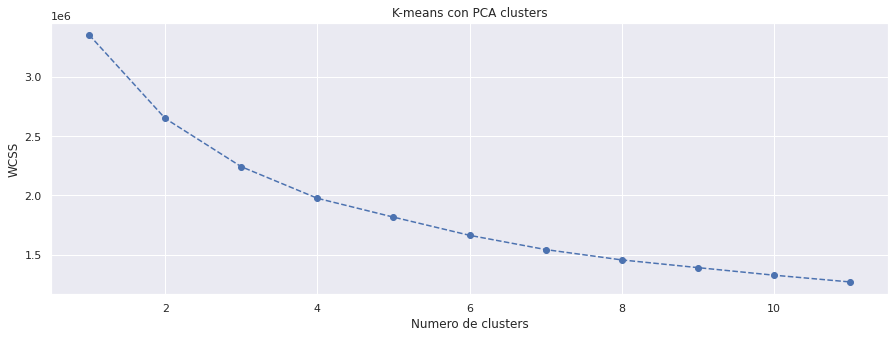

In [38]:
plt.figure(figsize=(15,5))
plt.plot(range(1,12), wcss, marker = 'o', linestyle = '--') 
plt.title('K-means con PCA clusters')
plt.ylabel('WCSS')
plt.xlabel('Numero de clusters')
plt.show()

*El grafico de WCSS evidencia que el codo se encuentra alrededor de 4-5 clusters*

In [39]:
algoritmo =  KMeans(n_clusters= 5, init = 'k-means++',
                      max_iter= 300, n_init =10)
algoritmo.fit(df)  

KMeans(n_clusters=5)

In [40]:
df

,Reg_year,Runned_Miles,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num,Ad_price_GBP,Engine_size,Entry_price_GBP,Gas_emission,Age
0,-2.841218,-0.561657,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,1.031926,6.464613,6.666836,6.518888,2.863529
1,-2.841218,-0.196791,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,0.571506,6.464613,6.666836,6.518888,2.620575
2,-2.841218,-0.112416,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,0.972996,3.302961,5.735993,5.109545,2.620575
3,-2.841218,-0.027037,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,0.560453,6.464613,6.666836,6.518888,2.863529
4,-2.841218,0.122467,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476884,0.131882,-0.372274,0.533044,6.464613,6.666836,6.518888,2.863529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209515,0.054426,0.847912,-0.419943,0.135576,-0.547336,-0.780856,0.433394,1.723388,-0.072508,0.131882,0.621760,-0.254767,-0.385633,-0.108884,-0.944225,-0.051919
209516,0.054426,0.897807,-0.419943,0.135576,-0.547336,-0.780856,0.433394,1.067420,-0.072508,0.131882,0.621760,-0.319791,-0.385633,-0.108884,-0.944225,-0.051919
209517,0.054426,0.920611,-0.419943,0.135576,-0.547336,-0.780856,0.433394,1.723388,-0.072508,0.131882,0.621760,-0.325068,-0.385633,-0.108884,-0.944225,-0.051919
209518,0.054426,0.962206,-0.419943,0.135576,-0.547336,-0.780856,0.433394,1.723388,-0.072508,0.131882,0.621760,-0.349080,-0.385633,-0.108884,-0.944225,-0.051919


<Figure size 1080x360 with 0 Axes>

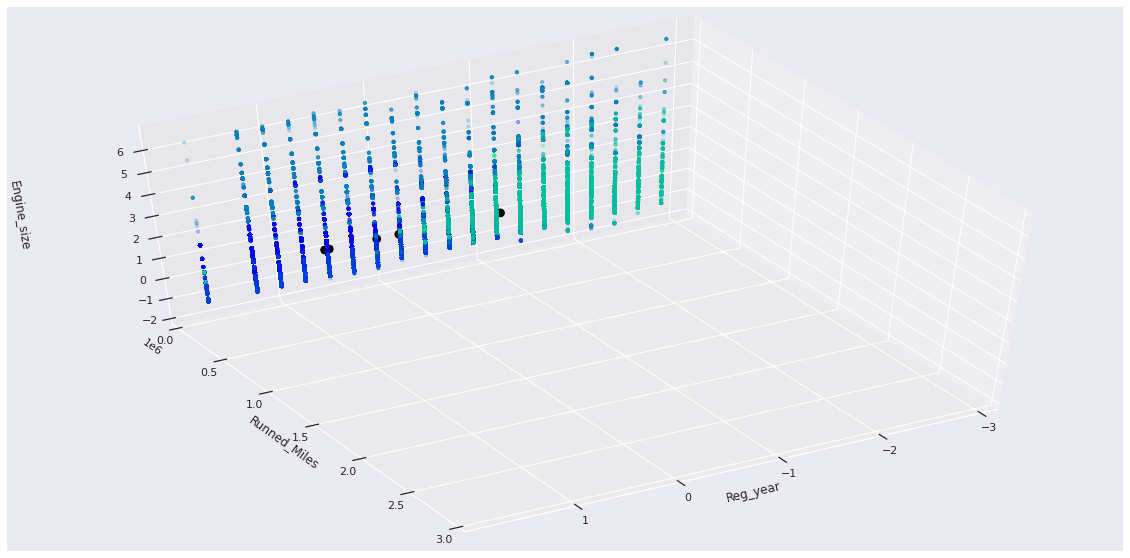

In [41]:
plt.figure(figsize=(15,5))
y_kmeans = algoritmo.predict(df) 

ax = plt.figure(figsize=(20,10)).gca(projection='3d')

centers = algoritmo.cluster_centers_
ax.scatter(
    xs=centers[:, 0], 
    ys=centers[:, 1], 
    c = 'black',     
    alpha = 1, 
    s = 60,
    
)



ax.scatter(
    xs=df["Reg_year"], 
    ys=df["Runned_Miles"], 
    zs=df["Engine_size"], 
    c = y_kmeans,  
    cmap='winter',
    s = 10,
    alpha = 0.2  
)
ax.set_xlabel('Reg_year')
ax.set_ylabel('Runned_Miles')
ax.set_zlabel('Engine_size')

#rotacion de ejes
ax.azim = 300
ax.elev = 10

#limit
#ax.axes.set_xlim3d(min(df["Reg_year"]),10) 
ax.axes.set_ylim3d(min(df["Runned_Miles"]),3e6)  
#ax.axes.set_zlim3d(min(df["Engine_size"]),10)  

ax.zaxis.labelpad=50  
ax.azim = 60
ax.elev = 50       

plt.show()

# DBSCAN 

*El DBSCAN identifica regiones con alta densidad de observaciones seperas por regiones de baja densidad.*</br> 
*Para que una observación forme parte de un cluster, tiene que haber un mínimo de observaciones vecinas dentro de un radio de proximidad y de que los clusters están separados por regiones vacías o con pocas observaciones.*

Text(0, 0.5, 'Distance')

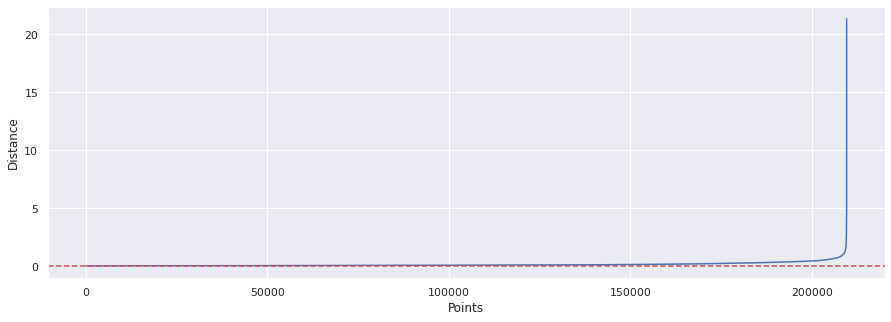

In [42]:
k = 2
data_nn = df.copy() 

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

plt.figure(figsize=(15,5)) 
sns.lineplot(
    x = i, 
    y = distances
)

plt.axhline(y = 0.00008, color = 'r', linestyle='--')

plt.xlabel("Points")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

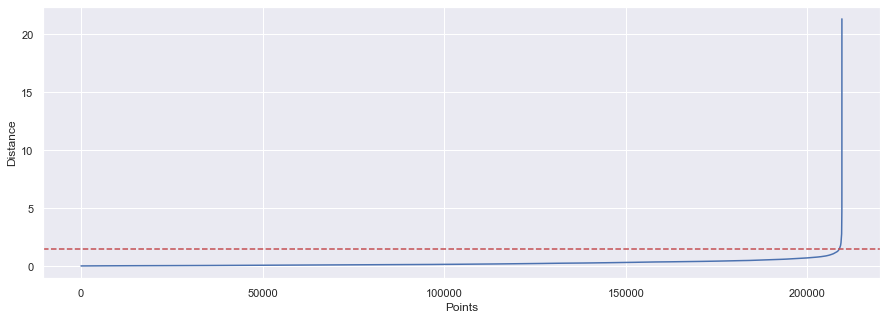

In [ ]:
plt.figure(figsize=(15,5)) 
sns.lineplot(
    x = i, 
    y = distances
)

plt.axhline(y = 1.5, color = 'r', linestyle='--') 

plt.xlabel("Points")
plt.ylabel("Distance")

*la mejor distancia se encuentre aproximadamente en 10,000.*

In [ ]:
db_1 = DBSCAN(eps=1.5, min_samples=8).fit(df)  

C:\Users\pulzara\AppData\Local\Temp/ipykernel_13040/1570679377.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(20,10)).gca(projection='3d')


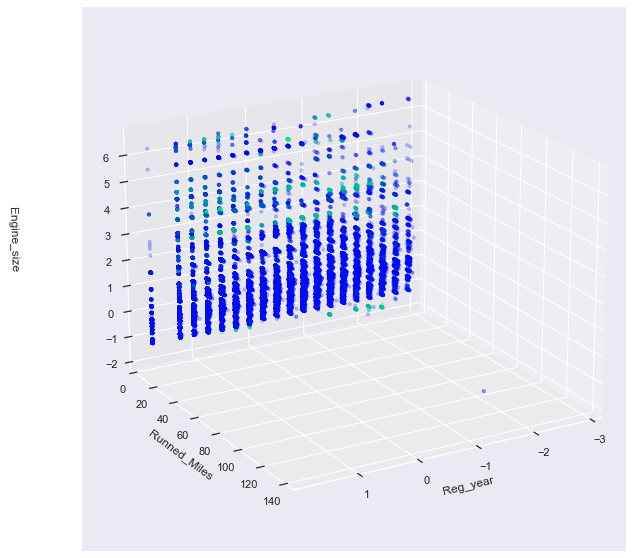

In [ ]:
labels = db_1.labels_

ax = plt.figure(figsize=(20,10)).gca(projection='3d')
ax.scatter(
    xs=df["Reg_year"], 
    ys=df["Runned_Miles"], 
    zs=df["Engine_size"], 
    c = labels,  
    cmap='winter',
    s = 10,
    alpha = 0.2  
)
ax.set_xlabel('Reg_year')
ax.set_ylabel('Runned_Miles')
ax.set_zlabel('Engine_size')

#rotacion de ejes
ax.azim = 300
ax.elev = 10

#limit
#ax.axes.set_xlim3d(min(df["Reg_year"]),10) 
ax.axes.set_ylim3d(min(df["Runned_Miles"]),max(df["Runned_Miles"]))   
#ax.axes.set_zlim3d(min(df["Engine_size"]),10)  

ax.zaxis.labelpad=50  
ax.azim = 60 
ax.elev = 20       

plt.show()


# PCA 

*El análisis de componentes principales (PCA), consiste en expresar un conjunto de variables en un conjunto de combinaciones lineales, de factores no correlacionados entre sí. Este método permite representar los datos originales en un espacio de dimensión inferior del espacio original, mientras se limite al máximo la perdida de información. La representación de los datos en espacios de baja dimensión (2 dimensiones) nos facilita considerablemente el análisis.*

In [ ]:
pca = PCA() 
pca.fit(df) 

PCA()

In [ ]:
pca.explained_variance_ratio_.shape

(17,)

**Varianza explicativa** 

Text(0.5, 0, 'Components')

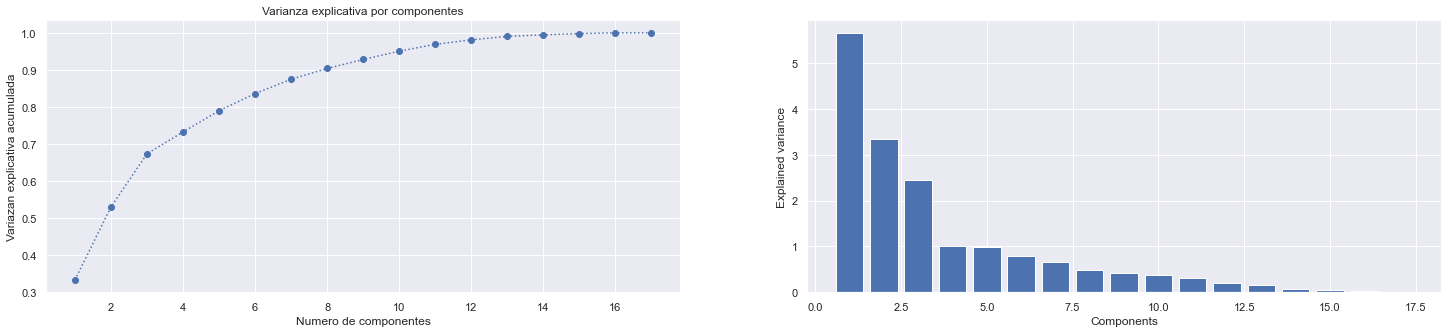

In [ ]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = ':') 
plt.title('Varianza explicativa por componentes')
plt.xlabel('Numero de componentes')
plt.ylabel('Variazan explicativa acumulada')

plt.subplot(1,2,2) 
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')

***El grafico de varianza explicativa describe cuanto de porcentaje de datos se pierden en funcion del numero de componentes.*** <br>
*Por debajo de 0.9 de varianza NO es aceptable la perdida de información. Entonces, en este caso decidimos elegir 3 componentes* 

***EL grafico de varianza explicada vs componentes, evidencia la importancia de la cantidad de componentes*** <br>
*En este caso despues de la 5 componente ya no explica mucho el comportamiento de los datos* 

*Entrenamos los datos con PCA con 3 componentes.*

In [ ]:
pca = PCA(n_components=10) 
pca.fit(df)  

PCA(n_components=10)

In [ ]:
pca = pca.transform(df)  

Text(0, 0.5, 'PCA 3')

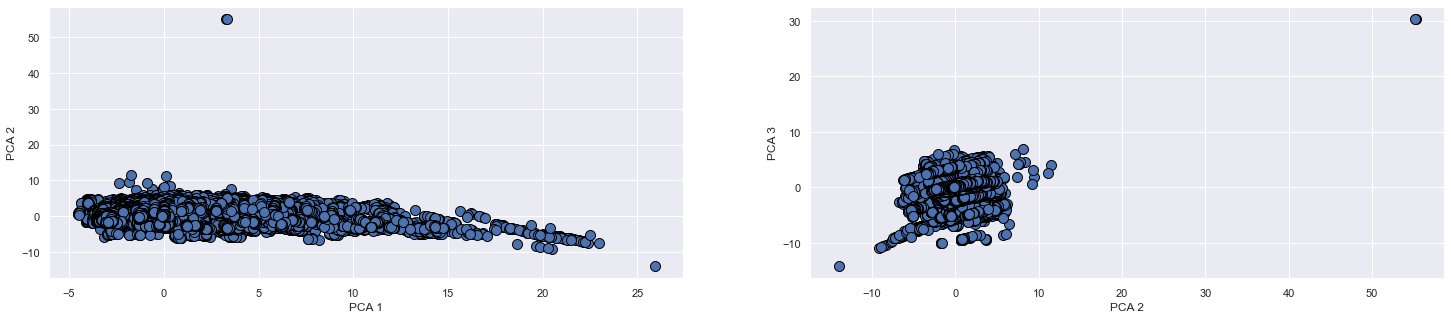

In [ ]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
mglearn.discrete_scatter(pca[:,0], pca[:,1])   
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1,2,2) 
mglearn.discrete_scatter(pca[:,1], pca[:,2])   
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')

*Se puede observar como es la distribucion de nuestras nuevas variables en 2D.*  

***Creamos un dataframe de las nuevas variables con el fin de entrenar los modelos de clusterizacion***

In [ ]:
result=pd.DataFrame(pca, columns=['PCA%i' % i for i in range(10)], index=df.index)

result  

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,12.000701,2.849190,1.771252,-1.071790,-0.773086,-0.812983,-0.017271,-0.385916,-1.275428,0.082364
1,11.837100,3.020722,1.905551,0.398919,-1.159545,-0.699530,-0.011487,-0.363284,-0.925079,-0.055158
2,9.891796,2.711089,1.626396,-0.040614,-0.498152,-0.510944,-0.210154,-0.349538,-1.510891,0.210534
3,11.896456,3.131805,1.959346,-1.687383,-0.275345,-0.591080,-0.004405,-0.268534,-0.953426,-0.008709
4,11.892679,3.193726,1.995139,-1.668154,-0.229951,-0.546741,0.032984,-0.205793,-0.910204,-0.016623
...,...,...,...,...,...,...,...,...,...,...
209515,-1.285477,-0.280910,0.106661,0.204538,1.430375,0.396921,1.482705,0.326461,0.163361,-0.198728
209516,-1.157679,-0.025605,0.192718,1.201761,0.822769,0.269875,1.317547,0.139496,0.203350,-0.301862
209517,-1.303569,-0.237416,0.133707,0.216681,1.461597,0.425128,1.484599,0.340270,0.210035,-0.213997
209518,-1.338182,-0.167857,0.152089,1.506176,0.973771,0.403245,1.516018,0.348377,0.230784,-0.241561


In [ ]:
df.shape 

(209520, 17)

**Tiene la misma cantidad de filas que el dataset original.** 

C:\Users\pulzara\AppData\Local\Temp/ipykernel_13040/1714263779.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(20,10)).gca(projection='3d')


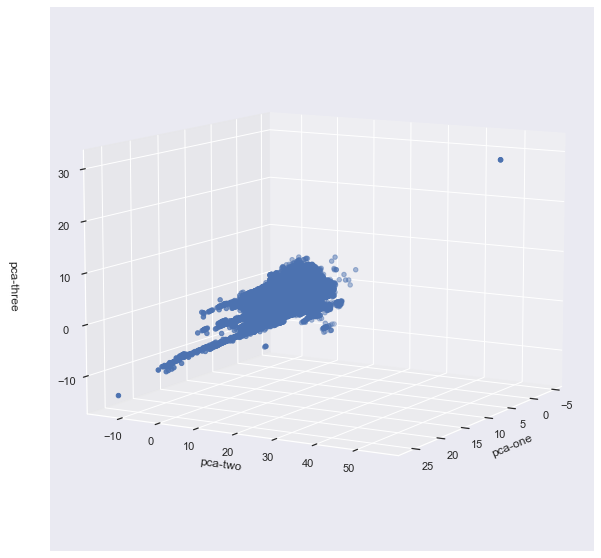

In [ ]:
ax = plt.figure(figsize=(20,10)).gca(projection='3d')
ax.scatter(
    xs=result["PCA0"], 
    ys=result["PCA1"], 
    zs=result["PCA2"],   
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

ax.zaxis.labelpad=20

ax.azim = 30
ax.elev = 10

plt.show() 

## K-means - PCA

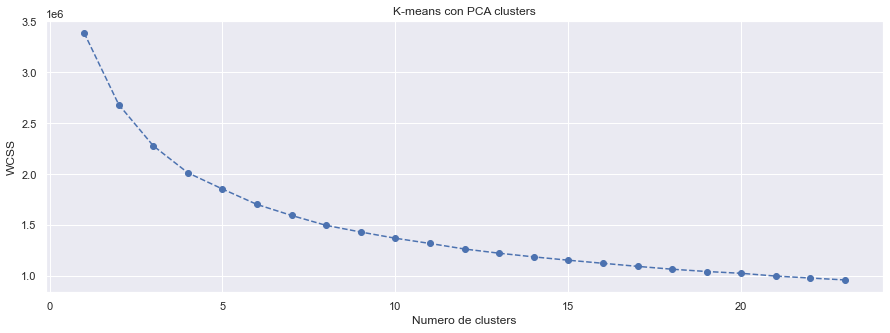

In [ ]:
wcss =  []

for i in range(1,24):
  kmeans_pca =  KMeans(n_clusters= i, init = 'k-means++', random_state=50)
  kmeans_pca.fit(result) 
  wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1,24), wcss, marker = 'o', linestyle = '--')
plt.title('K-means con PCA clusters')
plt.ylabel('WCSS')
plt.xlabel('Numero de clusters')
plt.show()

*El grafico de WCSS evidencia que el codo se encuentra alrededor de 3-5 clusters.*

## Kmeans - PCA 

In [ ]:
 algoritmo =  KMeans(n_clusters= 5, init = 'k-means++',
                      max_iter= 300, n_init =10)
algoritmo.fit(result) 

KMeans(n_clusters=5)

C:\Users\pulzara\AppData\Local\Temp/ipykernel_13040/2585630893.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(20,10)).gca(projection='3d')


<Figure size 1080x360 with 0 Axes>

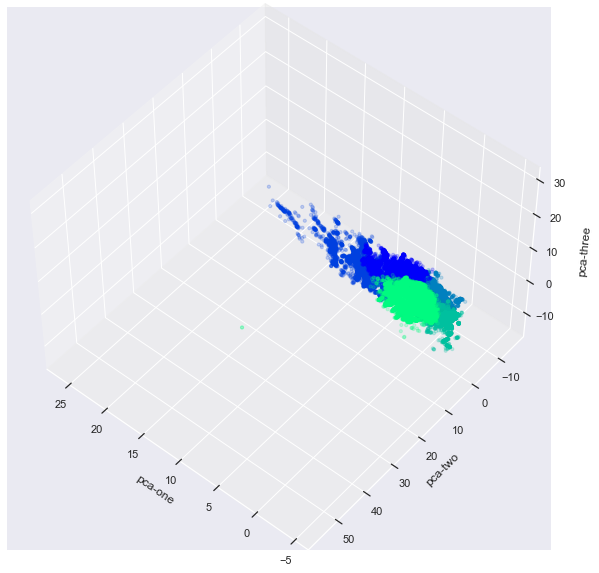

In [ ]:
plt.figure(figsize=(15,5))
y_kmeans = algoritmo.predict(result)

ax = plt.figure(figsize=(20,10)).gca(projection='3d')

centers = algoritmo.cluster_centers_
ax.scatter(
    xs=centers[:, 0], 
    ys=centers[:, 1], 
    c = 'black',     
    alpha = 1, 
    s = 60,
    
)



ax.scatter(
    xs=result["PCA0"], 
    ys=result["PCA1"], 
    zs=result["PCA2"], 
    c = y_kmeans,  
    cmap='winter',
    s = 10,
    alpha = 0.2  
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

#rotacion de ejes
ax.azim = 300
ax.elev = 10

#limit
#ax.axes.set_xlim3d(min(result["PCA0"]),4e6)  
#ax.axes.set_ylim3d(min(result["PCA1"]),max(result["PCA1"]))
#ax.axes.set_zlim3d(0,400000) 

ax.zaxis.labelpad=10
ax.azim = 130   
ax.elev = 50

plt.show()

In [ ]:
centers = algoritmo.cluster_centers_
centers 

array([[-0.95915, -1.10441, -0.18047,  0.01653, -0.00034,  0.01571,
        -0.0368 , -0.02316,  0.04265, -0.00834],
       [ 4.85971, -0.46924, -0.24959, -0.09635, -0.19076, -0.22575,
         0.03751,  0.07565,  0.12494, -0.10441],
       [-0.14683,  1.90714,  0.37083,  0.00684,  0.06585,  0.05244,
         0.04535,  0.01073, -0.11021,  0.04893]])

## DBSCAN - PCA 

***K-vecinos***

Para elegir el parámetro epsilon, es decir, la distancia máxima a la que debe haber otra observación para considerar que cúmple con el criterio de vecino cercano, debemos saber que tan de cerca o de lejos se encuentran las variables entre sí.

In [ ]:
k = 2
data_nn = result.copy()

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))



Text(0, 0.5, 'Distance')

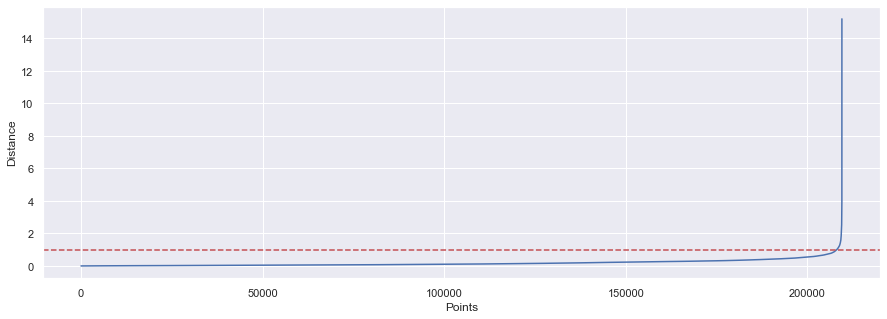

In [ ]:
plt.figure(figsize=(15,5)) 
sns.lineplot(
    x = i, 
    y = distances
)

plt.axhline(y = 1, color = 'r', linestyle='--')

plt.xlabel("Points")
plt.ylabel("Distance") 

*la mejor distancia se encuentre aproximadamente en 1.*

In [ ]:
db_1 = DBSCAN(eps=1, min_samples=8).fit(result)    
labels = db_1.labels_ 
 

C:\Users\pulzara\AppData\Local\Temp/ipykernel_13040/3119286377.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(20,10)).gca(projection='3d')


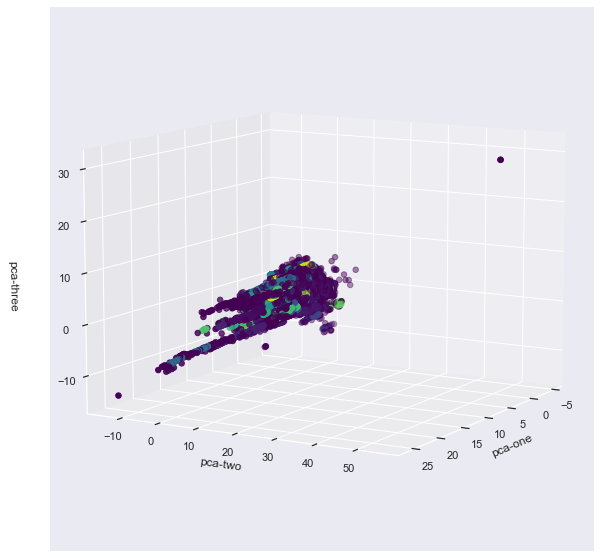

In [ ]:
ax = plt.figure(figsize=(20,10)).gca(projection='3d')
ax.scatter(
    xs=result["PCA0"], 
    ys=result["PCA1"], 
    zs=result["PCA2"], 
    c = labels, 
    cmap='viridis',
    s = 30
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

ax.zaxis.labelpad=20
ax.azim = 30 
ax.elev = 10

plt.show() 

# Conclusion

**Se puede concluir que el modelo K-MEANS separa mejor el comportamiento de los datos que DBSCAN. Por otro lado, se selecciono el valor de n_clusters = 5, debido al grafico de WCSS donde la curvatura se encuentra alrededor de 3-5.**